In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 9

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 9)                 99        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/12 [=>............................] - ETA: 3s - loss: 2.2165 - accuracy: 0.1719
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 1s 18ms/step - loss: 2.1870 - accuracy: 0.1588 - val_loss: 2.0975 - val_accuracy: 0.2465
Epoch 2/1000
 1/12 [=>............................] - ETA: 0s - loss: 2.2198 - accuracy: 0.1250
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 6ms/step - loss: 2.1220 - accuracy: 0.2095 - val_loss: 2.0484 - val_accuracy: 0.2742
Epoch 3/1000
 1/12 [=>............................] - ETA: 0s - loss: 2.0676 - accuracy: 0.2188
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 2.0640 - accuracy: 0.2266 - val_loss: 1.9909 - val_accuracy: 0.3077
Epoch 4/1000
 1/12 [=>............................] - ETA: 0s - loss: 2.0250 - accuracy: 0.2578


 1/12 [=>............................] - ETA: 0s - loss: 1.2325 - accuracy: 0.4297
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 1.1402 - accuracy: 0.5369 - val_loss: 0.9234 - val_accuracy: 0.6765
Epoch 29/1000
 1/12 [=>............................] - ETA: 0s - loss: 1.2841 - accuracy: 0.4609
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 1.1542 - accuracy: 0.5145 - val_loss: 0.9139 - val_accuracy: 0.6746
Epoch 30/1000
 1/12 [=>............................] - ETA: 0s - loss: 1.1875 - accuracy: 0.5391
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 1.1335 - accuracy: 0.5349 - val_loss: 0.8943 - val_accuracy: 0.6864
Epoch 31/1000
 1/12 [=>............................] - ETA: 0s - loss: 1.1433 - accuracy: 0.5312
Epoch 31

 1/12 [=>............................] - ETA: 0s - loss: 0.9219 - accuracy: 0.6406
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.9502 - accuracy: 0.6113 - val_loss: 0.6468 - val_accuracy: 0.8008
Epoch 56/1000
 1/12 [=>............................] - ETA: 0s - loss: 1.0519 - accuracy: 0.5703
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 6ms/step - loss: 0.9447 - accuracy: 0.6364 - val_loss: 0.6401 - val_accuracy: 0.7988
Epoch 57/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.9483 - accuracy: 0.6484
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.9458 - accuracy: 0.6199 - val_loss: 0.6288 - val_accuracy: 0.8008
Epoch 58/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.9356 - accuracy: 0.6250
Epoch 58

 1/12 [=>............................] - ETA: 0s - loss: 0.8197 - accuracy: 0.7266
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.8464 - accuracy: 0.6733 - val_loss: 0.5085 - val_accuracy: 0.8383
Epoch 83/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.8286 - accuracy: 0.6875
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.8348 - accuracy: 0.6660 - val_loss: 0.5018 - val_accuracy: 0.8738
Epoch 84/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.8647 - accuracy: 0.7344
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.8431 - accuracy: 0.6680 - val_loss: 0.4989 - val_accuracy: 0.8679
Epoch 85/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.8364 - accuracy: 0.6953
Epoch 85

 1/12 [=>............................] - ETA: 0s - loss: 0.7529 - accuracy: 0.7422
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.7860 - accuracy: 0.7062 - val_loss: 0.4297 - val_accuracy: 0.9191
Epoch 110/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.7696 - accuracy: 0.7188
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.7961 - accuracy: 0.6976 - val_loss: 0.4302 - val_accuracy: 0.9231
Epoch 111/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.7231 - accuracy: 0.7188
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.7723 - accuracy: 0.6943 - val_loss: 0.4267 - val_accuracy: 0.9231
Epoch 112/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.8230 - accuracy: 0.7109
Ep

Epoch 136/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.8122 - accuracy: 0.6641
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.7188 - accuracy: 0.7292 - val_loss: 0.3826 - val_accuracy: 0.9408
Epoch 137/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.7589 - accuracy: 0.7188
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.7085 - accuracy: 0.7312 - val_loss: 0.3789 - val_accuracy: 0.9389
Epoch 138/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.6701 - accuracy: 0.7344
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.7272 - accuracy: 0.7181 - val_loss: 0.3772 - val_accuracy: 0.9369
Epoch 139/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.7753 - accu

Epoch 163/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.7262 - accuracy: 0.6953
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.7115 - accuracy: 0.7279 - val_loss: 0.3595 - val_accuracy: 0.9329
Epoch 164/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.6903 - accuracy: 0.7656
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.6780 - accuracy: 0.7457 - val_loss: 0.3579 - val_accuracy: 0.9329
Epoch 165/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.6525 - accuracy: 0.7109
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.6663 - accuracy: 0.7549 - val_loss: 0.3515 - val_accuracy: 0.9310
Epoch 166/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.7505 - accu

Epoch 190/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.6085 - accuracy: 0.7656
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.6839 - accuracy: 0.7444 - val_loss: 0.3352 - val_accuracy: 0.9349
Epoch 191/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.7712 - accuracy: 0.6797
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.6921 - accuracy: 0.7246 - val_loss: 0.3352 - val_accuracy: 0.9408
Epoch 192/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.5807 - accuracy: 0.8125
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.6518 - accuracy: 0.7543 - val_loss: 0.3300 - val_accuracy: 0.9408
Epoch 193/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.5735 - accu

Epoch 217/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.6865 - accuracy: 0.7266
Epoch 217: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.6292 - accuracy: 0.7536 - val_loss: 0.3020 - val_accuracy: 0.9389
Epoch 218/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.6311 - accuracy: 0.7500
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.6283 - accuracy: 0.7648 - val_loss: 0.2980 - val_accuracy: 0.9408
Epoch 219/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.7007 - accuracy: 0.8047
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.6610 - accuracy: 0.7635 - val_loss: 0.3009 - val_accuracy: 0.9389
Epoch 220/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.5958 - accu

Epoch 244/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.6135 - accuracy: 0.7578
Epoch 244: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.6541 - accuracy: 0.7470 - val_loss: 0.3014 - val_accuracy: 0.9369
Epoch 245/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.6219 - accuracy: 0.7734
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.6077 - accuracy: 0.7727 - val_loss: 0.2981 - val_accuracy: 0.9389
Epoch 246/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.4831 - accuracy: 0.8516
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.5964 - accuracy: 0.7675 - val_loss: 0.2943 - val_accuracy: 0.9408
Epoch 247/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.6997 - accu

Epoch 271/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.4695 - accuracy: 0.8594
Epoch 271: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.6103 - accuracy: 0.7839 - val_loss: 0.2775 - val_accuracy: 0.9527
Epoch 272/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.5150 - accuracy: 0.8047
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.6289 - accuracy: 0.7536 - val_loss: 0.2761 - val_accuracy: 0.9527
Epoch 273/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.5915 - accuracy: 0.8047
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.6200 - accuracy: 0.7661 - val_loss: 0.2793 - val_accuracy: 0.9507
Epoch 274/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.5813 - accu

Epoch 298/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.6004 - accuracy: 0.8047
Epoch 298: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.6311 - accuracy: 0.7648 - val_loss: 0.2742 - val_accuracy: 0.9487
Epoch 299/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.5933 - accuracy: 0.7891
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.5828 - accuracy: 0.7872 - val_loss: 0.2774 - val_accuracy: 0.9507
Epoch 300/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.6227 - accuracy: 0.7734
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.5890 - accuracy: 0.7806 - val_loss: 0.2708 - val_accuracy: 0.9467
Epoch 301/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.4838 - accu

Epoch 325/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.6826 - accuracy: 0.7109
Epoch 325: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.5961 - accuracy: 0.7708 - val_loss: 0.2671 - val_accuracy: 0.9507
Epoch 326/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.6629 - accuracy: 0.7812
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.5749 - accuracy: 0.7912 - val_loss: 0.2629 - val_accuracy: 0.9487
Epoch 327/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.6546 - accuracy: 0.7422
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 0.5967 - accuracy: 0.7754 - val_loss: 0.2620 - val_accuracy: 0.9546
Epoch 328/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.6178 - accu

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

4/4 [==============================] - 0s 1ms/step - loss: 0.2570 - accuracy: 0.9586


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[1.8462623e-14 1.1563921e-01 6.0278948e-02 5.7541062e-08 1.6135258e-08
 7.5903103e-11 1.1947058e-04 8.2169865e-10 8.2396233e-01]
8


# 混同行列

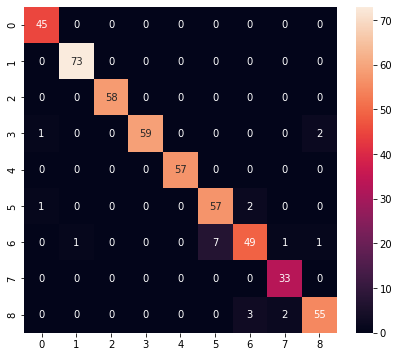

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        45
           1       0.99      1.00      0.99        73
           2       1.00      1.00      1.00        58
           3       1.00      0.95      0.98        62
           4       1.00      1.00      1.00        57
           5       0.89      0.95      0.92        60
           6       0.91      0.83      0.87        59
           7       0.92      1.00      0.96        33
           8       0.95      0.92      0.93        60

    accuracy                           0.96       507
   macro avg       0.96      0.96      0.96       507
weighted avg       0.96      0.96      0.96       507



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Gabriel\AppData\Local\Temp\tmpg882t5wz\assets


6640

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 1 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.8462554e-14 1.1563909e-01 6.0278945e-02 5.7541058e-08 1.6135258e-08
 7.5903110e-11 1.1947080e-04 8.2169865e-10 8.2396239e-01]
8
